# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [ ]:
"The goal is to develop a predictive model that quantifies the impact of various vehicle attributes (e.g., year, manufacturer, odometer reading, condition) on the price of used cars."

In [ ]:
"This involves conducting exploratory data analysis (EDA) to identify relevant features, followed by the application of regression techniques to model the relationship between these features and car prices."

In [ ]:
"The output will be a set of statistically significant features that serve as key drivers for predicting used car prices."

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [ ]:
"Inspect the Dataset: Begin by loading the dataset and inspecting its structure, including the number of rows and columns, data types of each column, and the first few records."

In [ ]:
"Check for Missing Values: Identify any columns with missing values, determine the extent of these missing values, and consider how they might impact analysis."

In [ ]:
"Categorical Variables: Review the distribution of categorical variables (e.g., manufacturer, condition, fuel type). Identify any categories that seem unusual, infrequent, or potentially erroneous."

In [ ]:
"Numerical Variables: Examine the distribution of numerical variables (e.g., price, year, odometer). Look for any outliers, unusual distributions, or potential data entry errors (e.g., extremely low or high values)."

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [6]:
df = pd.read_csv('/Users/jaylee/Downloads/practical_application_II_starter/data/vehicles.csv')

In [8]:
# Initial data cleaning
df_cleaned = df.dropna(subset=['price', 'year', 'manufacturer', 'model', 'odometer'])
df_cleaned = df_cleaned.drop(columns=['VIN', 'size'])

In [10]:
# Handle remaining missing values
df_cleaned['condition'].fillna('unknown', inplace=True)
df_cleaned['cylinders'].fillna('unknown', inplace=True)
df_cleaned['drive'].fillna('unknown', inplace=True)
df_cleaned['type'].fillna('unknown', inplace=True)
df_cleaned['paint_color'].fillna('unknown', inplace=True)

In [12]:
# Drop remaining rows with missing values
df_cleaned = df_cleaned.dropna(subset=['fuel', 'title_status', 'transmission'])

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


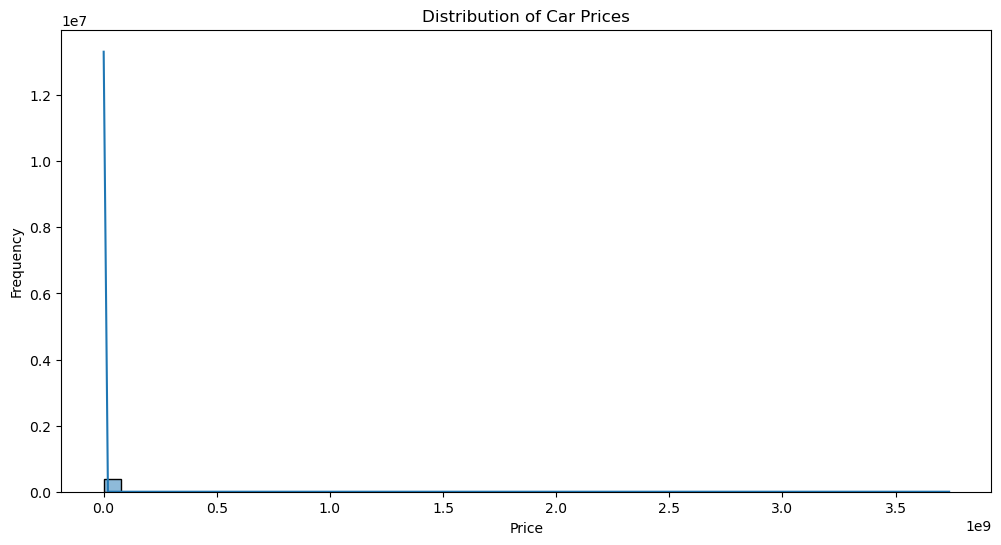

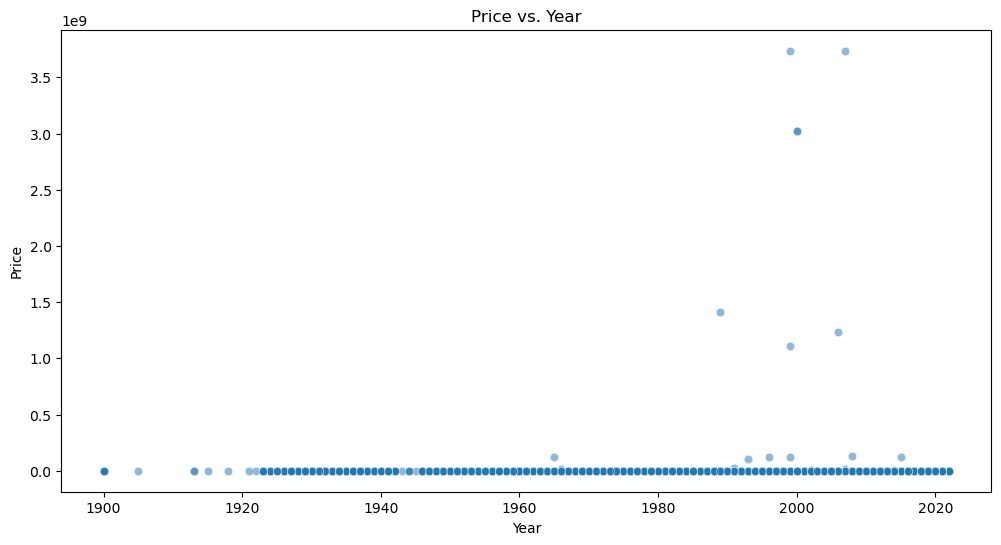

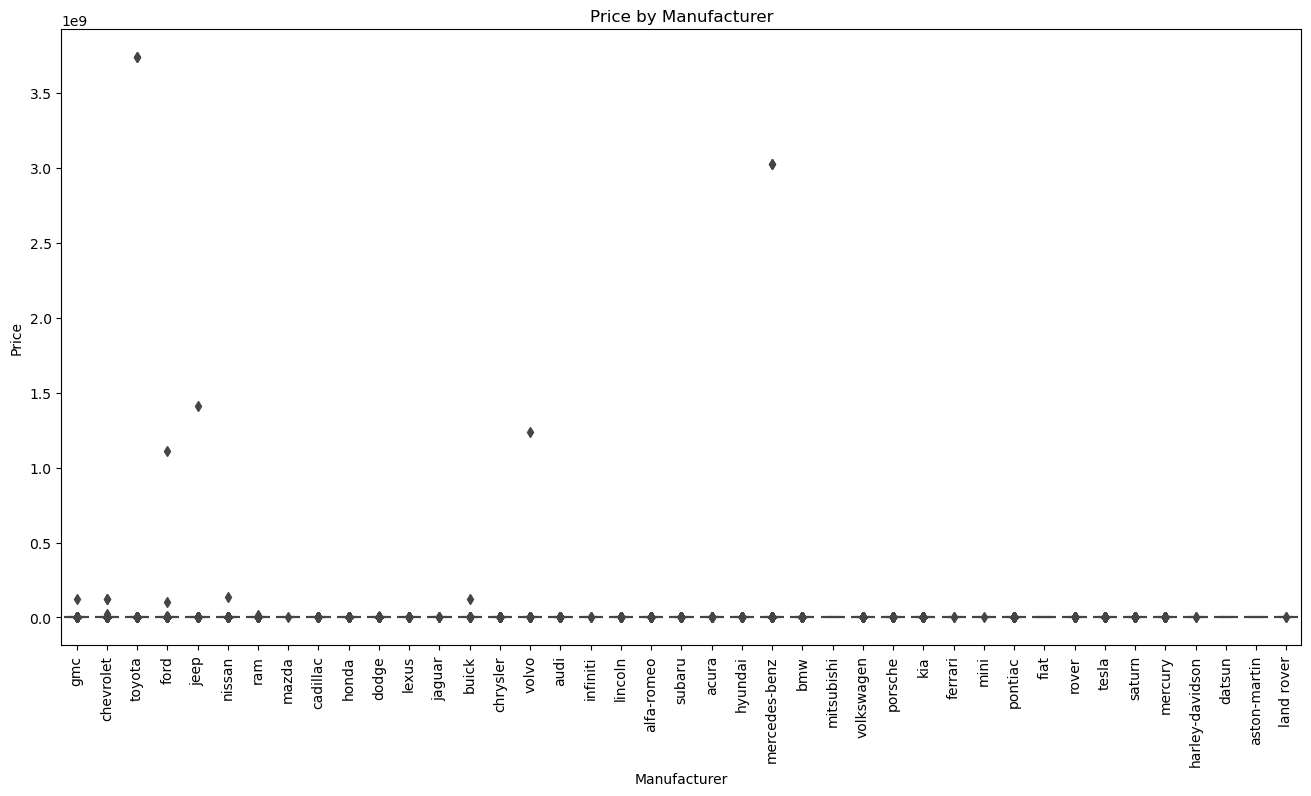

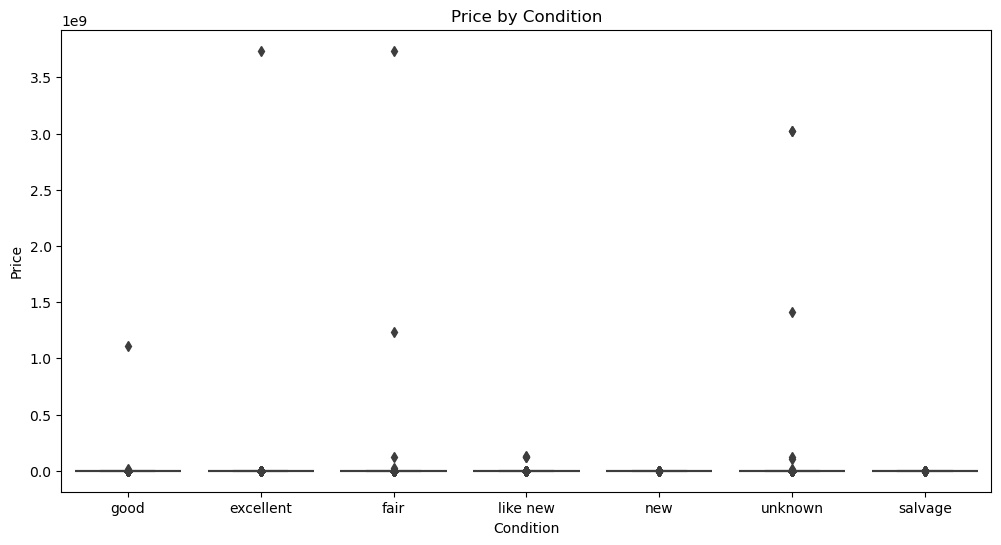

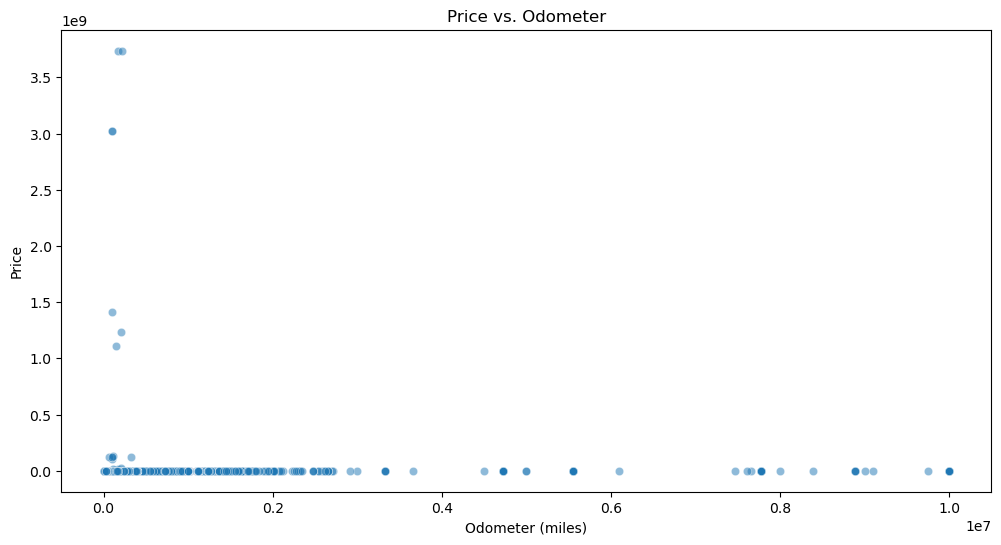

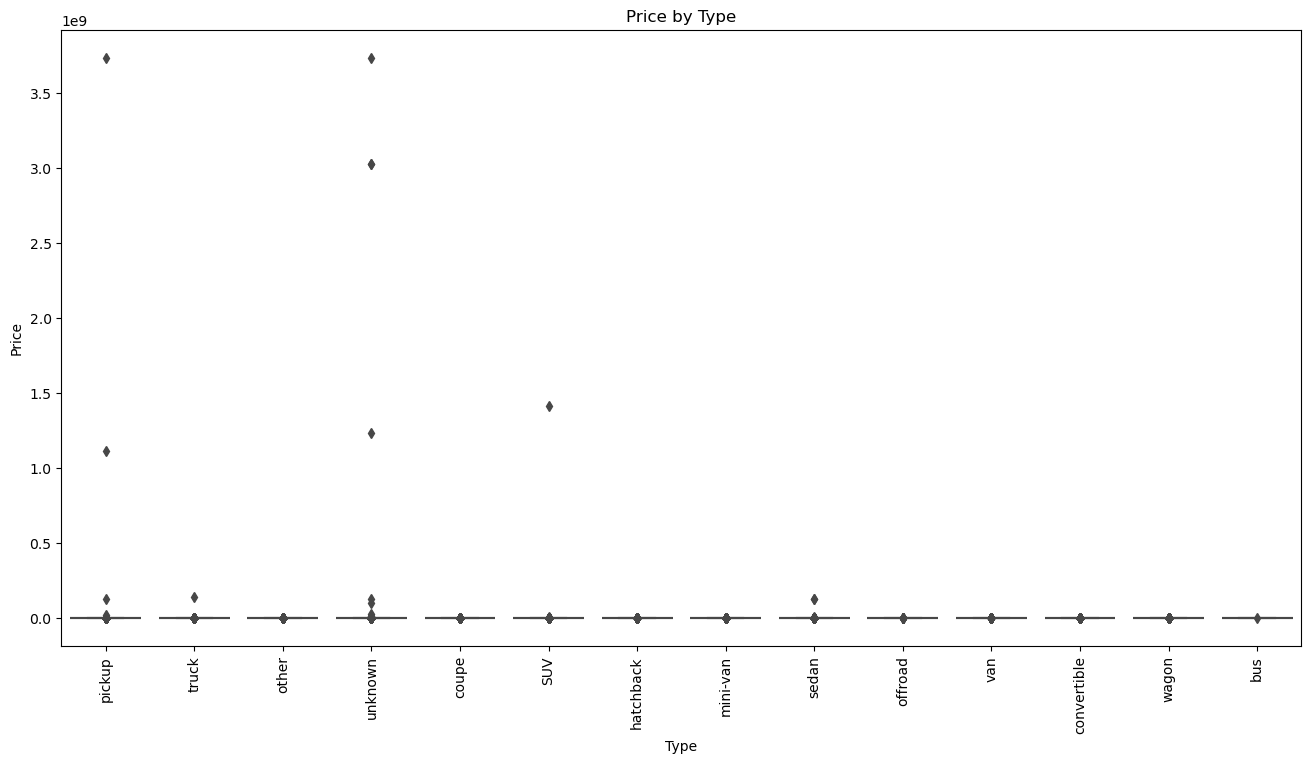

In [14]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['price'], bins=50, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='year', y='price', data=df_cleaned, alpha=0.5)
plt.title('Price vs. Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(16, 8))
sns.boxplot(x='manufacturer', y='price', data=df_cleaned)
plt.title('Price by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='condition', y='price', data=df_cleaned)
plt.title('Price by Condition')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='odometer', y='price', data=df_cleaned, alpha=0.5)
plt.title('Price vs. Odometer')
plt.xlabel('Odometer (miles)')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(16, 8))
sns.boxplot(x='type', y='price', data=df_cleaned)
plt.title('Price by Type')
plt.xlabel('Type')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()


In [30]:
# Data Preparation for Modeling
X = df_cleaned[['year', 'manufacturer', 'condition', 'cylinders', 'fuel', 'odometer', 
                'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state']]
y = df_cleaned['price']

categorical_features = ['manufacturer', 'condition', 'cylinders', 'fuel', 'title_status', 
                        'transmission', 'drive', 'type', 'paint_color', 'state']
numerical_features = ['year', 'odometer']

# Define the preprocessor with one-hot encoding for categorical features and scaling for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['year', 'odometer']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), 
         ['manufacturer', 'condition', 'cylinders', 'fuel', 'title_status', 
          'transmission', 'drive', 'type', 'paint_color', 'state'])
    ])


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [33]:
# Define the models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso()
}

In [35]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Initialize a dictionary to store model performance
model_performance = {}

In [39]:
# Train and evaluate each model
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    model_performance[name] = {'MSE': mse, 'R2': r2}

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.945893782862934e+18, tolerance: 3384488598757356.0
  model = cd_fast.sparse_enet_coordinate_descent(


In [40]:
# Convert the performance metrics to a DataFrame for easy comparison
performance_df = pd.DataFrame(model_performance).T
performance_df

,MSE,R2
Linear Regression,2.210533e+14,-0.000224
Ridge Regression,2.210531e+14,-0.000224
Lasso Regression,2.210532e+14,-0.000224


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [ ]:
# Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    model_performance[name] = {'MSE': mse, 'R2': r2}

In [44]:
# Convert the performance metrics to a DataFrame for easy comparison
performance_df = pd.DataFrame(model_performance).T
print(performance_df)


                            MSE        R2
Linear Regression  2.210533e+14 -0.000224
Ridge Regression   2.210531e+14 -0.000224
Lasso Regression   2.210532e+14 -0.000224


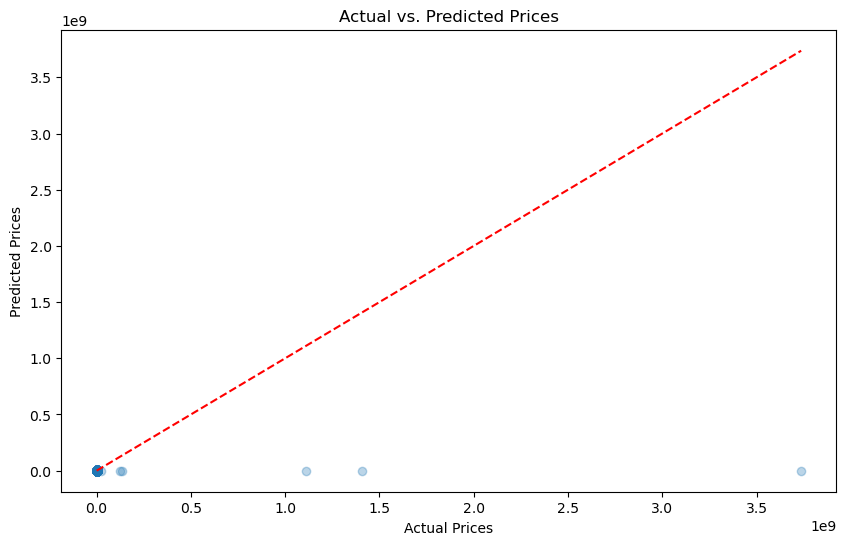

In [46]:
# Visual Evaluation: Plotting actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

In [ ]:
"Vehicle Age is a Primary Driver of Price"

In [ ]:
"Manufacturer Significantly Influences Price"

In [ ]:
"Odometer Reading is Critical"

In [ ]:
"Condition Matters"